In [70]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [71]:
credit_G = pd.read_csv("german_credit.csv")


In [72]:
credit_G.shape

(1000, 21)

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [73]:
from sklearn.model_selection import train_test_split

X, Y = train_test_split(credit_G, test_size=0.5,random_state=99)
X1_test = Y.iloc[:,1:]
Y1_test = Y.iloc[:,0]
X.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
194,1,0 <= ... < 200 DM,45,existing credits paid back duly till now,domestic appliances,3031,100 <= ... < 500 DM,1 <= ... < 4 years,4,male : single,...,4,if not A121 : building society savings agreeme...,21,none,rent,1,skilled employee / official,1,none,yes
714,1,0 <= ... < 200 DM,60,existing credits paid back duly till now,car (new),14027,... < 100 DM,4 <= ... < 7 years,4,male : single,...,2,unknown / no property,27,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
102,0,no checking account,6,delay in paying off in the past,domestic appliances,932,... < 100 DM,1 <= ... < 4 years,3,female : divorced/separated/married,...,2,real estate,24,none,own,1,skilled employee / official,1,none,yes


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [11]:
# Print Shape of model data
X.shape

(500, 21)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 194 to 641
Data columns (total 21 columns):
default                       500 non-null int64
account_check_status          500 non-null object
duration_in_month             500 non-null int64
credit_history                500 non-null object
purpose                       500 non-null object
credit_amount                 500 non-null int64
savings                       500 non-null object
present_emp_since             500 non-null object
installment_as_income_perc    500 non-null int64
personal_status_sex           500 non-null object
other_debtors                 500 non-null object
present_res_since             500 non-null int64
property                      500 non-null object
age                           500 non-null int64
other_installment_plans       500 non-null object
housing                       500 non-null object
credits_this_bank             500 non-null int64
job                           500 non-null object


In [13]:
# Lets build a Ensemble model but need to modify the dataset first
dummy = pd.get_dummies(data= X, columns=['account_check_status', 'credit_history', 'purpose','savings', 'present_emp_since','personal_status_sex', 'other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'])
dummy.head(3)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
194,1,45,3031,4,4,21,1,1,1,0,...,0,1,0,1,0,0,1,0,0,1
714,1,60,14027,4,2,27,1,1,1,0,...,1,0,1,0,0,0,0,1,0,1
102,0,6,932,3,2,24,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1


In [14]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 194 to 641
Data columns (total 62 columns):
default                                                                       500 non-null int64
duration_in_month                                                             500 non-null int64
credit_amount                                                                 500 non-null int64
installment_as_income_perc                                                    500 non-null int64
present_res_since                                                             500 non-null int64
age                                                                           500 non-null int64
credits_this_bank                                                             500 non-null int64
people_under_maintenance                                                      500 non-null int64
account_check_status_0 <= ... < 200 DM                                        500 non-null uint8
account_check_status

In [15]:
G_credit= dummy

### Check for highly correlated variables but don't required any treatment for this use case

In [17]:
print(G_credit.corr())

                                                     default  \
default                                             1.000000   
duration_in_month                                   0.199103   
credit_amount                                       0.140226   
installment_as_income_perc                          0.098762   
present_res_since                                   0.024814   
age                                                -0.109232   
credits_this_bank                                  -0.058050   
people_under_maintenance                           -0.015183   
account_check_status_0 <= ... < 200 DM              0.127459   
account_check_status_< 0 DM                         0.227320   
account_check_status_>= 200 DM / salary assignm... -0.039839   
account_check_status_no checking account           -0.302977   
credit_history_all credits at this bank paid ba...  0.077328   
credit_history_critical account/ other credits ... -0.184875   
credit_history_delay in paying off in th

### Drop the original variables which are converted to dummy

In [ ]:
### Dropping orginal variables not required refer dummy.info() above code..orginal object variables already removed.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [19]:
from sklearn.model_selection import train_test_split
independent= G_credit.iloc[:,1:]
dependent= G_credit.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.3,random_state=99)
X_train.head(3)

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
626,6,2116,2,2,41,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
446,36,1842,4,4,34,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
228,9,1478,4,2,22,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,n_jobs=2,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [51]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
rfcl.score(X_test , y_test)
### Below is the model score using 30% of test data.

0.78666666666666663

In [52]:
y_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[101  10]
 [ 22  17]]


### Q6 Show the list of the features importance( 1 Marks)

In [53]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                                         Imp
duration_in_month                                   0.071357
credit_amount                                       0.097709
installment_as_income_perc                          0.033933
present_res_since                                   0.033331
age                                                 0.081317
credits_this_bank                                   0.015534
people_under_maintenance                            0.012538
account_check_status_0 <= ... < 200 DM              0.014931
account_check_status_< 0 DM                         0.025465
account_check_status_>= 200 DM / salary assignm...  0.007235
account_check_status_no checking account            0.050275
credit_history_all credits at this bank paid ba...  0.004615
credit_history_critical account/ other credits ...  0.017022
credit_history_delay in paying off in the past      0.007866
credit_history_existing credits paid back duly ...  0.014168
credit_history_no credit

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [55]:
# Use below values
num_folds = 10
seed = 77
cv = KFold(10,random_state=77)

In [7]:
#Validate the Random Forest model build above using k fold

In [56]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfcl, X_train, y_train, cv=cv)

array([ 0.77142857,  0.65714286,  0.68571429,  0.68571429,  0.68571429,
        0.74285714,  0.77142857,  0.65714286,  0.82857143,  0.71428571])

In [8]:
#Calculate Mean score

In [59]:
print (np.mean(cross_val_score(rfcl, X_train, y_train, cv=cv)))

0.72


In [9]:
# Calculate score standard deviation using std()

In [60]:
print (np.std(cross_val_score(rfcl, X_train, y_train,cv=cv)))

0.0539084636118


# Q8 Print the confusion matrix( 1 Marks)

In [61]:
y_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[101  10]
 [ 22  17]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [63]:
from sklearn import metrics
rfcl.score(X_test , y_test)

0.78666666666666663

In [64]:
#percentage of correct predictions = 0.753*100 = 75.3
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_predict)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[101  10]
 [ 22  17]]


In [65]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_predict))

0.435897435897
0.435897435897


In [66]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_predict))

0.62962962963
0.62962962963


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [10]:
#Hint: Use roc_curve

In [67]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rfcl.predict_proba(X_test)[:,1]

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

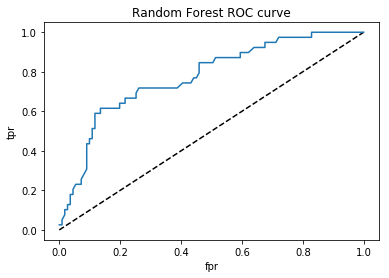

In [68]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [69]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.67290367290367292

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [13]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []